# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
arquivo = 'demo01_encoded.csv'
df = pd.read_csv(arquivo)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   idade                                   16650 non-null  float64
 4   tempo_emprego                           16650 non-null  float64
 5   possui_celular                          16650 non-null  int64  
 6   possui_fone_comercial                   16650 non-null  int64  
 7   possui_fone                             16650 non-null  int64  
 8   possui_email                            16650 non-null  int64  
 9   qt_pessoas_residencia                   16650 non-null  float64
 10  mau                                     16650 non-null  in

In [8]:
y = df.mau
X = df.drop('mau', axis = 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
clf = DecisionTreeClassifier(random_state=123)

In [11]:
clf = clf.fit(X_train, y_train)

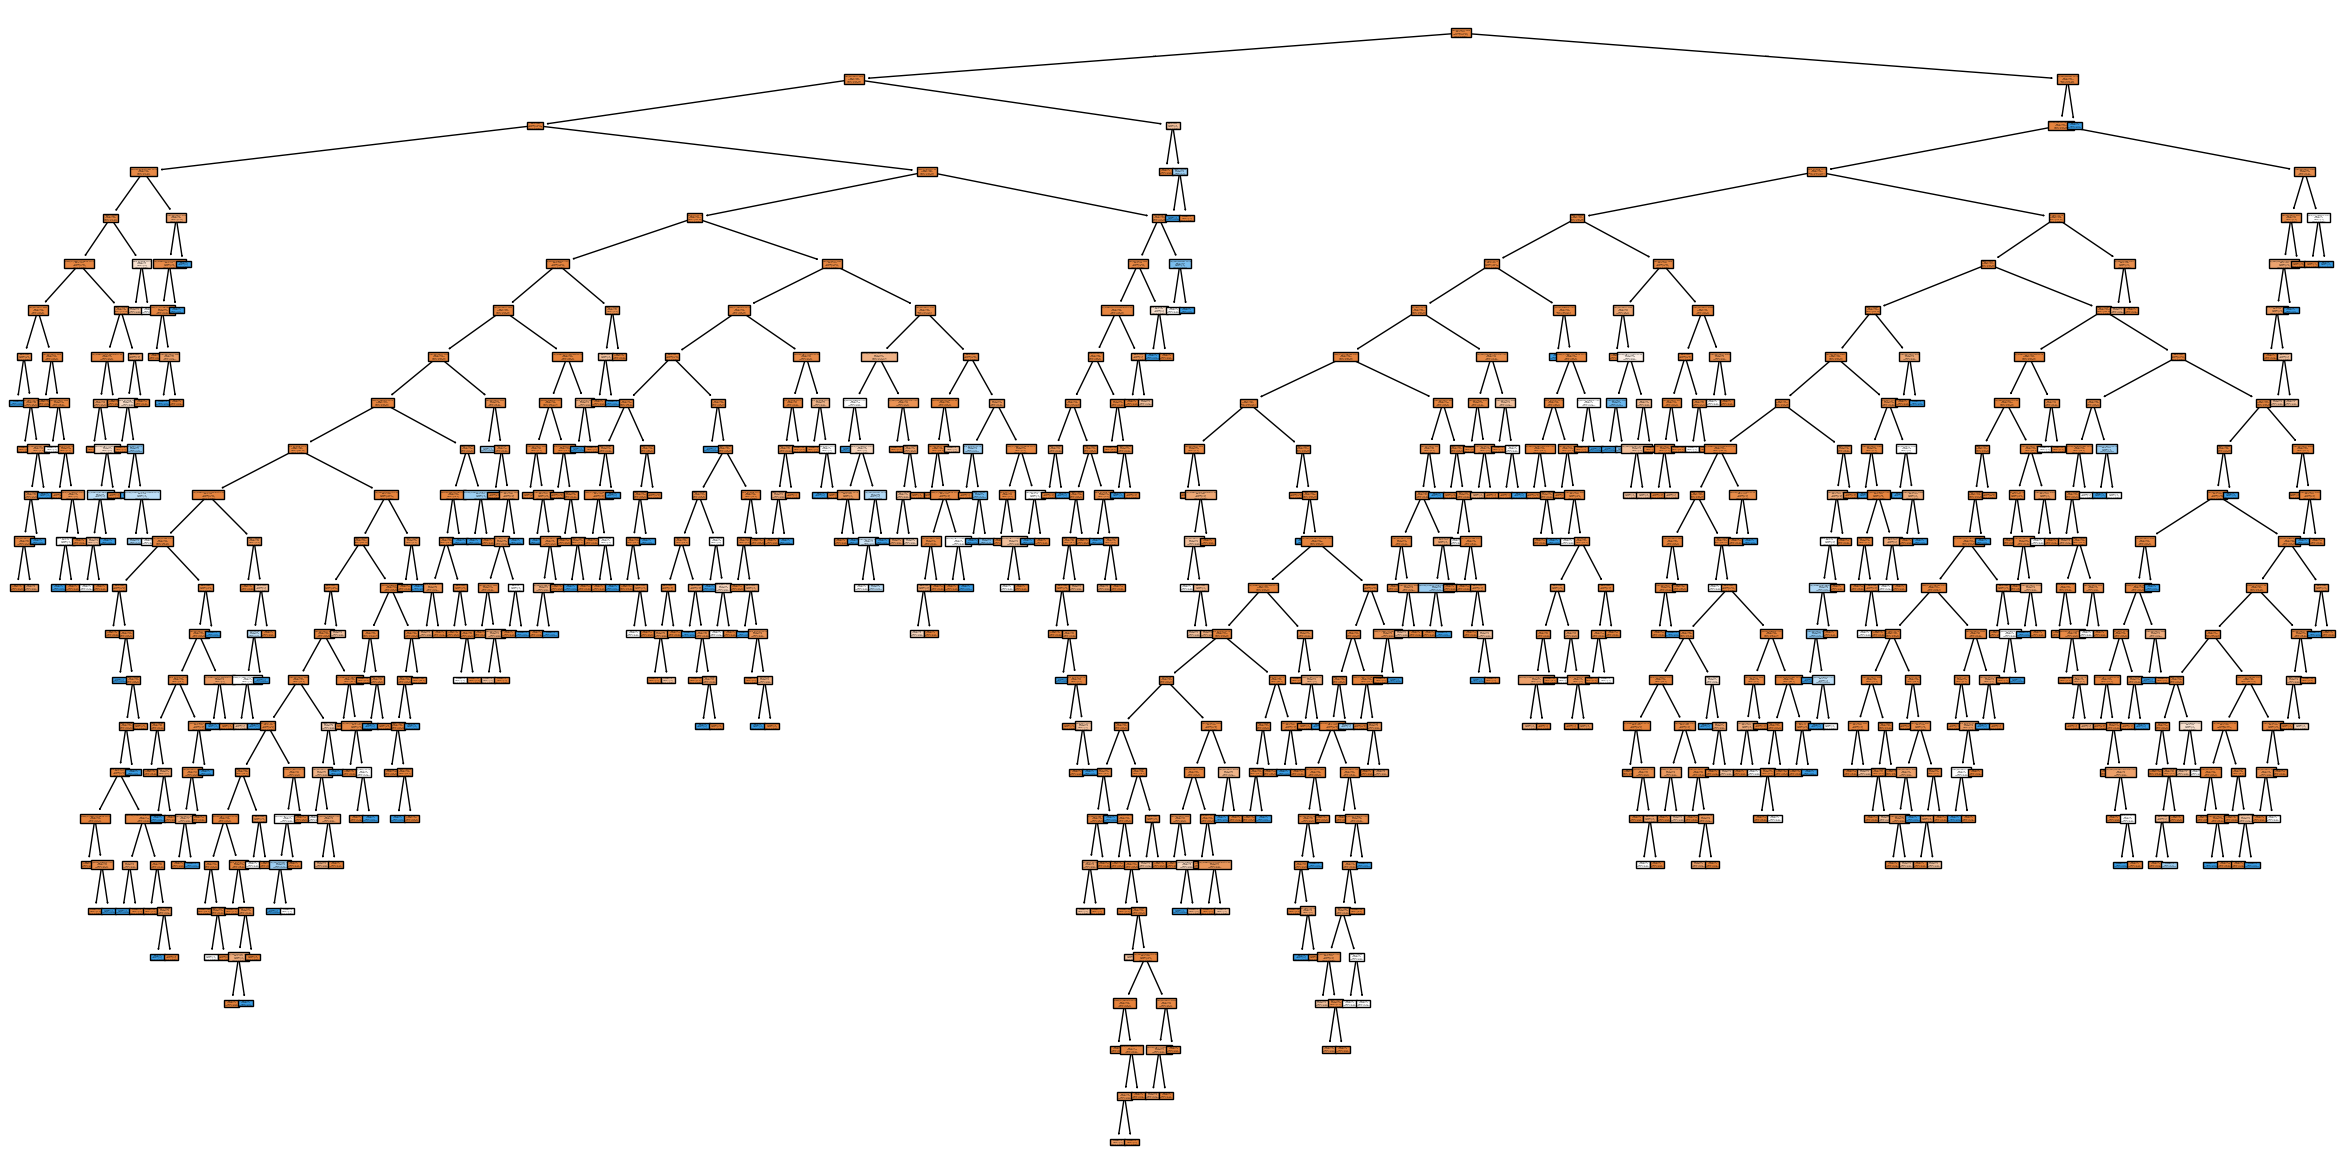

In [15]:
plt.figure(figsize=(30,15))
plot_tree(clf,
         filled=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=X_train.columns);

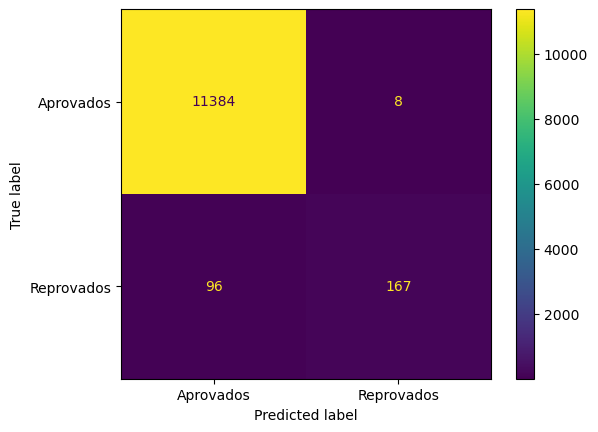

In [16]:
y_predict_train = clf.predict(X_train)

cm = confusion_matrix(y_train, y_predict_train)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp_train.plot()

In [24]:
print(f' Acuracia_Treino: {round(accuracy_score(y_train, y_predict_train)*100, 2)}%')

 Acuracia_Treino: 99.11%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

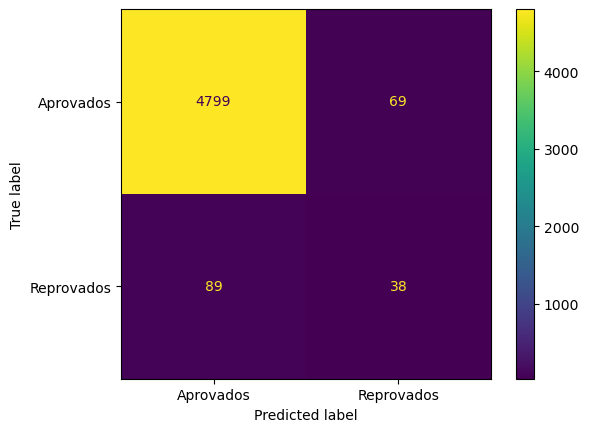

In [43]:
y_prev_teste = clf.predict(X_test)
cm_teste = confusion_matrix(y_test, y_prev_teste)
disp_teste = ConfusionMatrixDisplay(confusion_matrix=cm_teste, display_labels=['Aprovados', 'Reprovados'])
disp_teste.plot()

In [29]:
print(f' Accuracy_score (Teste): {round(accuracy_score(y_test, y_prev_teste)*100, 2)}%')

 Accuracy_score (Teste): 96.84%


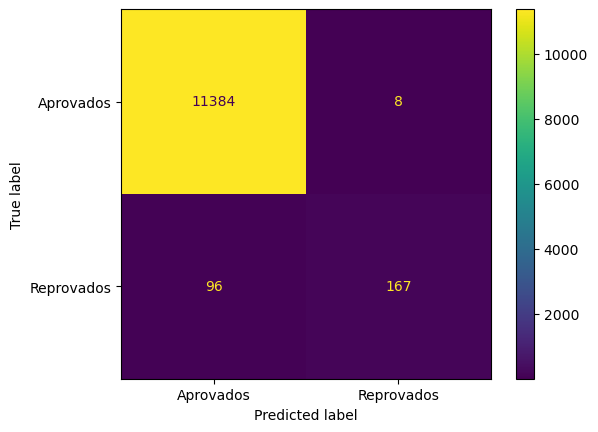

In [32]:
#3.4 treino
clf_2 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state=123)
clf_2 = clf_2.fit(X_train, y_train)
y_predict_train_2 = clf_2.predict(X_train)
cm_2 = confusion_matrix(y_train, y_predict_train)
disp_train_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=['Aprovados', 'Reprovados'])
disp_train_2.plot()

In [46]:
#3.4 treino
proporcao_maus = np.mean(y_predict_train_2 == 1)
round(proporcao_maus * 100, 2)

0.49

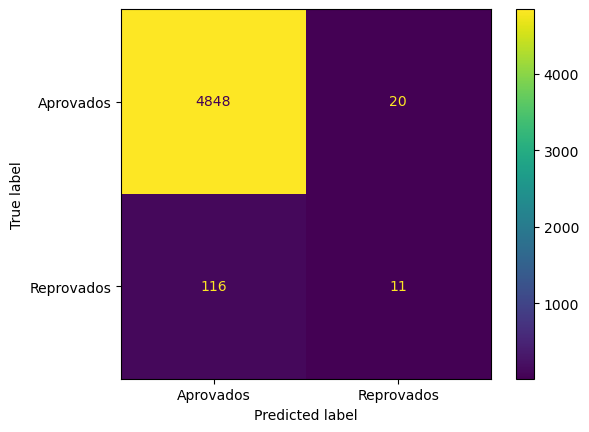

In [31]:
#3.4 teste
y_prev_teste_2 = clf_2.predict(X_test)
cm_teste_2 = confusion_matrix(y_test, y_prev_teste_2)
disp_teste_2 = ConfusionMatrixDisplay(confusion_matrix=cm_teste_2, display_labels=['Aprovados', 'Reprovados'])
disp_teste_2.plot()

In [47]:
#3.4 teste
proporcao_maus = np.mean(y_prev_teste_2 == 1)
round(proporcao_maus * 100, 2)

0.62

In [55]:
#3.5
y_all_bons = np.zeros_like(y_test)
print(f' Accuracy_score (Teste): {round(accuracy_score(y_all_bons, y_prev_teste)*100, 2)}%')

 Accuracy_score (Teste): 97.86%
